# Real time penny stock pump and dump trading strategy

*Warning: This project is for educational purpose only.*

*We are not responsible for any legal or ethical issues.*



This project aims to guide you through how people exploit group decision bias and the herd effect to deceive investors into chasing the hype of penny stocks. The inspiration for this project stems from a paper authored by Peter (same author in this project), titled "Behavioral Economics - Group Decision Bias in the Stock Market," which was published in the Economics department at Michigan State University.

The purpose of this project is to illustrate how retail investors and traders frequently experience overconfidence, attentional deficits, self-attribution bias, active trading, and loss aversion, all of which contribute to biased investment decisions. In the presence of such biases and the herding effect, investors often rely on their own preferences, psychological factors, or the comments of others when making investment decisions.

This project will involve the following steps:

1. Research and Analysis: We will utilize the pyfinviz library to conduct real-time scans of target penny stocks. This library will be constructed in a class format, making it easy for users to adjust parameters for future use.

2. OpenAI API: We will leverage the OpenAI API to generate fake insider news. In this phase, we will employ a large language model such as ChatGPT to create hypothetical news, such as breakthroughs in potential cancer cures or new technologies.

3. Social Media: We will utilize social media platforms to disseminate these news stories. It's important to note that we will only outline the approach and will not provide any code or connect to any social media APIs due to legal and ethical considerations.

4. Monitoring Tools: For real-time monitoring of stock price movements and market trend analysis for future trading strategies, we will utilize the yfinance library from Yahoo Finance.

5. Trading Strategy: We will develop a simple pump and dump strategy for demonstration purposes only. This will involve actions such as mass buying if there is a greater than 3% increase, and selling out positions when there is a 50% return. Additionally, we will implement a stop loss at -10%. It's important to note that these parameters can be adjusted for future use.

In [ ]:
pip install pyfinviz

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyfinviz: filename=pyfinviz-0.19-py3-none-any.whl size=26958 sha256=8e5d252b4899bc022d77d8c61f7ecf3bced1a586df257775caa1b148644f340a
  Stored in directory: /root/.cache/pip/wheels/d2/5d/51/d3c90f76e71af186d9a6328ce8577c7a9480f6be13f066aacd
  Created wheel for free-proxy: filename=free_proxy-1.1.1-py3-none-any.whl size=5637 sha256=7f7a7a35e66d4f90790ba4c7c6ebb76612e668e9b7c8c8b443cd79e06c8816a7
  Stored in directory: /root/.cache/pip/wheels/5a/96/c7/5a434714fff4fea9a59075428b142626e0a74f8c3bf90a50d0
Successfully built pyfinviz free-proxy


In [ ]:
pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
from pyfinviz.screener import Screener
from pyfinviz.quote import Quote
from pyfinviz.insider import Insider
import pandas as pd
import numpy as np
import openai
import os
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Research and Analysis

In [ ]:
class PennyStockScanner:
    def __init__(self):
        self.options = [
            Screener.MarketCapOption.SMALL_OVER_USD300MLN,
            Screener.PriceOption.UNDER_USD5,
            Screener.AverageVolumeOption.OVER_100K,
            Screener.SectorOption.HEALTHCARE,
            Screener.FloatShortOption.UNDER_5_PERCENT,
            Screener.CurrentVolumeOption.OVER_100K
        ]
        self.screener = None
        self.penny_list = None

    def scan_stocks(self):
        self.screener = Screener(filter_options=self.options,
                                 view_option=Screener.ViewOption.VALUATION,
                                 pages=[x for x in range(1, 100)])
        self.penny_list = self.screener.data_frames[1]["Ticker"]
        self.penny_list.name = None

    def get_prices(self):
        if self.penny_list is None:
            print("Please run scan_stocks() first")
            return None

        quote_list = []
        for ticker in self.penny_list:
            quote = Quote(ticker=ticker).price
            quote_list.append(quote)
        price_df = pd.DataFrame(data=quote_list, index=self.penny_list, columns=["Price"])
        return price_df

    def get_company_names(self):
        if self.penny_list is None:
            print("Please run scan_stocks() first")
            return None

        company_names = {}
        for ticker in self.penny_list:
            try:
                company_name = Quote(ticker=ticker).company_name
                company_names[ticker] = company_name
            except Exception as e:
                print(f"Failed to fetch company name for {ticker}: {e}")
                company_names[ticker] = "N/A"

        return company_names


In [ ]:
scanner = PennyStockScanner()
scanner.scan_stocks()
prices = scanner.get_prices()
print(prices)

      Price
ABUS   2.92
ACIU   3.44
ADAP   1.48
ADVM   2.00
AMRN   1.19
AMWL   1.06
ATAI   1.83
BVS    4.78
CATX   0.96
CERS   2.21
CRON   2.23
CVAC   3.30
CYH    2.93
IVVD   4.32
LAB    2.45
LIAN   4.79
MPLN   1.11
MREO   3.68
MXCT   4.59
NUVB   1.78


In [ ]:
scanner = PennyStockScanner()
scanner.scan_stocks()

company_names_dict = scanner.get_company_names()

for ticker, name in company_names_dict.items():
    print(f"{ticker}: {name}")


ABUS: Arbutus Biopharma Corp
ACIU: AC Immune SA
ADAP: Adaptimmune Therapeutics Plc ADR
ADVM: Adverum Biotechnologies Inc
AMRN: Amarin Corp ADR
AMWL: American Well Corporation
ATAI: ATAI Life Sciences N.V.
BVS: Bioventus Inc
CATX: Perspective Therapeutics Inc
CERS: Cerus Corp.
CRON: Cronos Group Inc
CVAC: CureVac N.V.
CYH: Community Health Systems, Inc.
IVVD: Invivyd Inc
LAB: Standard BioTools Inc
LIAN: LianBio ADR
MPLN: MultiPlan Corp
MREO: Mereo Biopharma Group Plc ADR
MXCT: MaxCyte Inc
NUVB: Nuvation Bio Inc


In [ ]:
company_names = list(company_names_dict.values())
print(company_names)

['Arbutus Biopharma Corp', 'AC Immune SA', 'Adaptimmune Therapeutics Plc ADR', 'Adverum Biotechnologies Inc', 'Amarin Corp ADR', 'American Well Corporation', 'ATAI Life Sciences N.V.', 'Bioventus Inc', 'Perspective Therapeutics Inc', 'Cerus Corp.', 'Cronos Group Inc', 'CureVac N.V.', 'Community Health Systems, Inc.', 'Invivyd Inc', 'Standard BioTools Inc', 'LianBio ADR', 'MultiPlan Corp', 'Mereo Biopharma Group Plc ADR', 'MaxCyte Inc', 'Nuvation Bio Inc']


### OpenAI API

In [ ]:
def HealthcareNewsGenerator(companys):
  openai.api_key = ""

  for company_name in company_names:
    messages = [
        {"role": "system", "content": "You are a news reporter that can generate exciting news in the health care industry as an insider."},
        {"role": "user", "content": f"Write a short hypothesis Twitter post or insider news involving the following company: {company_name}. Which is a healthcare company, for example, the story can contain new discovery of drugs that cure cancer, or discover new technology that detects diabetes etc. These stories are for educational purposes only, not real news."}
    ]

    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    print(f"News for {company_name}: {completion.choices[0].message['content']}\n")

In [ ]:
HealthcareNewsGenerator(company_names)

News for Arbutus Biopharma Corp: 🔬Exciting news from Arbutus Biopharma Corp! Insider sources suggest their innovative research team may have discovered a breakthrough drug candidate with potential to revolutionize the treatment of autoimmune diseases. Stay tuned for updates on this promising development! #HealthcareInnovation #BiopharmaBreakthrough

News for AC Immune SA: 🚀 Insider news! Sources reveal AC Immune SA is on the brink of a groundbreaking discovery in Alzheimer's treatment. Their innovative drug candidate shows promising results in preclinical trials, potentially revolutionizing the fight against neurodegenerative diseases. Stay tuned for updates! #HealthcareInnovation #ACImmuneSA

News for Adaptimmune Therapeutics Plc ADR: Insider News: Sources say Adaptimmune Therapeutics Plc ADR is on the cusp of revolutionizing cancer treatment with a breakthrough immunotherapy drug. Initial trials show unprecedented success in targeting and destroying cancer cells while sparing healthy

### Social Media

In [ ]:
# $ pip install tweepy

In [ ]:
# import tweepy

# api_key = "..."
# api_secrets = "..."
# access_token = "..."
# access_secret = "..."

# auth = tweepy.OAuthHandler(api_key,api_secrets)
# auth.set_access_token(access_token,access_secret)

# api = tweepy.API(auth)

# try:
#     api.verify_credentials()
#     print('Successful Authentication')
# except:
#     print('Failed authentication')

In [ ]:
# Text Post
# status = f"News for {company_name}: {completion.choices[0].message['content']}\n"
# api.update_status(status=status)

![Alt text](https://i.imgur.com/6GDLud9.png "twitter post")

### Monitoring Tools

### Trading Strategy

In [ ]:
ticker = list(company_names_dict.keys())
ticker = ticker
ticker

['ABUS',
 'ACIU',
 'ADAP',
 'ADVM',
 'AMRN',
 'AMWL',
 'ATAI',
 'BVS',
 'CATX',
 'CERS',
 'CRON',
 'CVAC',
 'CYH',
 'IVVD',
 'LAB',
 'LIAN',
 'MPLN',
 'MREO',
 'MXCT',
 'NUVB']

In [ ]:
def fetch_close_prices(tickers, start_date, end_date, intv):

    data = yf.download(tickers, start=start_date, end=end_date, interval=intv)

    if isinstance(data.columns, pd.MultiIndex):
        close_prices = data['Close']
    else:
        close_prices = data[['Close']]

    return close_prices

In [ ]:
prices = fetch_close_prices(ticker,"2024-02-05","2024-02-17","1d")
prices

[*********************100%%**********************]  20 of 20 completed


Ticker,ABUS,ACIU,ADAP,ADVM,AMRN,AMWL,ATAI,BVS,CATX,CERS,CRON,CVAC,CYH,IVVD,LAB,LIAN,MPLN,MREO,MXCT,NUVB
Date,,,,,,,,,,,,,,,,,,,,
2024-02-05,2.36,2.81,1.170,1.91,1.18,1.03,1.74,4.48,0.86,1.88,2.05,3.46,3.65,4.91,2.42,4.12,1.02,3.99,4.94,1.57
2024-02-06,2.47,2.72,1.330,2.50,1.23,1.07,1.79,4.56,0.87,2.23,2.16,3.55,3.67,4.88,2.39,4.17,1.08,4.01,4.94,1.62
2024-02-07,2.49,2.66,1.240,2.81,1.20,1.06,1.70,4.39,0.90,2.20,2.14,3.49,3.64,4.72,2.37,4.10,1.05,3.87,4.81,1.64
2024-02-08,2.54,2.83,1.150,1.97,1.23,1.08,1.75,4.41,0.85,2.30,2.16,3.48,3.73,5.04,2.36,4.09,1.09,4.02,4.85,1.70
2024-02-09,2.76,2.71,1.250,1.73,1.22,1.10,1.73,4.40,0.90,2.36,2.21,3.43,3.89,4.98,2.39,4.14,1.11,4.00,4.89,1.76
2024-02-12,2.87,2.90,1.210,1.99,1.21,1.16,1.88,4.58,0.83,2.37,2.17,3.49,4.13,4.17,2.39,4.04,1.14,3.89,4.95,1.76
2024-02-13,2.89,2.83,1.195,2.29,1.13,1.06,1.74,4.40,0.81,2.17,2.11,3.39,3.82,4.00,2.33,4.80,1.09,3.70,4.75,1.66
2024-02-14,2.91,2.84,1.280,2.10,1.18,1.11,1.77,4.41,0.85,2.33,2.11,3.43,3.94,4.00,2.36,4.76,1.18,3.63,4.67,1.72
2024-02-15,2.91,3.01,1.250,2.00,1.22,1.31,1.80,4.50,0.87,2.39,2.20,3.46,4.16,4.11,2.50,4.78,1.33,3.69,4.79,1.79


In [ ]:
daily_returns = prices.pct_change()
daily_returns

Ticker,ABUS,ACIU,ADAP,ADVM,AMRN,AMWL,ATAI,BVS,CATX,CERS,CRON,CVAC,CYH,IVVD,LAB,LIAN,MPLN,MREO,MXCT,NUVB
Date,,,,,,,,,,,,,,,,,,,,
2024-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-06,0.046610,-0.032028,0.136752,0.308901,0.042373,0.038835,0.028736,0.017857,0.011628,0.186170,0.053659,0.026012,0.005479,-0.006110,-0.012397,0.012136,0.058824,0.005013,0.000000,0.031847
2024-02-07,0.008097,-0.022059,-0.067669,0.124000,-0.024390,-0.009346,-0.050279,-0.037281,0.034483,-0.013453,-0.009259,-0.016901,-0.008174,-0.032787,-0.008368,-0.016787,-0.027778,-0.034913,-0.026316,0.012346
2024-02-08,0.020080,0.063910,-0.072581,-0.298932,0.025000,0.018868,0.029412,0.004556,-0.055556,0.045455,0.009346,-0.002865,0.024725,0.067797,-0.004219,-0.002439,0.038095,0.038760,0.008316,0.036585
2024-02-09,0.086614,-0.042403,0.086957,-0.121827,-0.008130,0.018519,-0.011429,-0.002268,0.058823,0.026087,0.023148,-0.014368,0.042895,-0.011905,0.012712,0.012225,0.018349,-0.004975,0.008247,0.035294
2024-02-12,0.039855,0.070111,-0.032000,0.150289,-0.008197,0.054545,0.086705,0.040909,-0.077778,0.004237,-0.018100,0.017493,0.061697,-0.162651,0.000000,-0.024155,0.027027,-0.027500,0.012270,0.000000
2024-02-13,0.006969,-0.024138,-0.012397,0.150754,-0.066116,-0.086207,-0.074468,-0.039301,-0.024096,-0.084388,-0.027650,-0.028653,-0.075061,-0.040767,-0.025105,0.188119,-0.043860,-0.048843,-0.040404,-0.056818
2024-02-14,0.006920,0.003534,0.071130,-0.082969,0.044248,0.047170,0.017241,0.002273,0.049383,0.073733,0.000000,0.011799,0.031414,0.000000,0.012876,-0.008333,0.082569,-0.018919,-0.016842,0.036145
2024-02-15,0.000000,0.059859,-0.023437,-0.047619,0.033898,0.180180,0.016949,0.020408,0.023529,0.025751,0.042654,0.008746,0.055838,0.027500,0.059322,0.004202,0.127119,0.016529,0.025696,0.040698


In [ ]:
# Identify buy signals (days where the return is greater than 3%)
buy_signals = daily_returns > 0.03
buy_signals

Ticker,ABUS,ACIU,ADAP,ADVM,AMRN,AMWL,ATAI,BVS,CATX,CERS,CRON,CVAC,CYH,IVVD,LAB,LIAN,MPLN,MREO,MXCT,NUVB
Date,,,,,,,,,,,,,,,,,,,,
2024-02-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-02-06,True,False,True,True,True,True,False,False,False,True,True,False,False,False,False,False,True,False,False,True
2024-02-07,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2024-02-08,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,True
2024-02-09,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
2024-02-12,True,True,False,True,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False
2024-02-13,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2024-02-14,False,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True
2024-02-15,False,True,False,False,True,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True


In [ ]:
portfolio = {
    'cash': 100000,
    'holdings': {},
    'total_value': 100000,
}

def update_total_value(portfolio, prices):
    total_holdings_value = 0
    for ticker, holding in portfolio['holdings'].items():
        if ticker in prices.columns:
            total_holdings_value += holding['quantity'] * prices[ticker][-1]
    portfolio['total_value'] = portfolio['cash'] + total_holdings_value

In [ ]:
portfolio

{'cash': 100000, 'holdings': {}, 'total_value': 100000}

In [ ]:
# Assume fake news will fluctuate the stock price for 10 days
def simulate_price_movements(prices, days=10, seed=20240309):
    np.random.seed(seed)
    simulated_prices = prices.copy()
    for _ in range(days):
      # Price fluctuate -50% or +100%
        daily_movement = 1 + np.random.uniform(-0.5, 1, simulated_prices.shape[1])
        last_prices = simulated_prices.iloc[-1] * daily_movement
        simulated_prices = pd.concat([simulated_prices, pd.DataFrame([last_prices], columns=simulated_prices.columns, index=[simulated_prices.index[-1] + pd.Timedelta(days=1)])])
    return simulated_prices

extended_prices = simulate_price_movements(prices, days=10)

In [ ]:
extended_prices = extended_prices.tail(10)
extended_prices

Ticker,ABUS,ACIU,ADAP,ADVM,AMRN,AMWL,ATAI,BVS,CATX,CERS,CRON,CVAC,CYH,IVVD,LAB,LIAN,MPLN,MREO,MXCT,NUVB
2024-02-17,5.641098,5.490168,1.773588,1.037088,1.321763,0.836794,3.206413,8.221968,1.482833,3.218121,3.052014,3.600187,6.659240,5.132472,2.412210,8.063222,0.781415,6.030155,2.729511,3.374427
2024-02-18,10.897364,9.450034,2.329412,0.679418,1.780760,0.540293,5.754011,4.648365,2.824232,5.620243,4.299475,4.832579,10.374779,5.747540,2.902373,15.325785,1.075208,5.655714,1.462489,1.747342
2024-02-19,21.182975,12.409156,4.107931,0.409423,2.670125,0.672433,10.347557,5.806655,3.830733,3.584274,2.211358,9.334118,11.789783,10.300966,5.026537,19.790842,1.157170,8.292819,2.479119,1.239425
2024-02-20,13.224420,24.578493,2.989079,0.720947,2.118290,0.656939,6.780433,3.920895,3.738241,4.108806,2.452718,13.609837,20.719746,5.819844,8.039083,17.881532,0.972331,13.950557,1.703295,1.747814
2024-02-21,12.591931,27.803242,3.936836,1.131464,3.928045,1.303125,12.712699,4.750488,2.815235,4.496264,2.339786,11.059292,35.917890,6.687810,9.552336,31.032535,0.973862,14.285912,3.375538,1.247353
2024-02-22,22.944780,27.564105,3.125499,2.200033,6.213802,1.045287,24.169684,5.801451,2.302545,3.290820,2.338959,8.979497,49.210401,10.536057,6.956167,46.823065,0.536241,26.124509,6.137826,1.495305
2024-02-23,14.559153,28.982788,5.592920,3.886638,5.822288,1.893993,27.011634,3.317545,1.929588,3.312573,2.620616,11.191884,54.415182,19.935350,3.611233,68.641282,0.618968,42.654957,3.422885,0.940014
2024-02-24,9.496663,46.378989,6.403106,6.699523,7.175777,1.972453,20.396774,3.460171,3.378018,2.362210,1.582496,10.774109,39.621968,31.003205,6.216585,136.946633,0.717452,35.377816,2.396743,1.082467
2024-02-25,10.616157,41.458865,4.171360,3.972709,4.360285,2.552822,14.661500,3.012543,4.155732,3.257665,1.022208,14.344433,75.867233,37.142111,7.876732,194.784233,0.361670,53.614551,4.647595,1.260054
2024-02-26,6.575272,76.330272,6.120836,7.526466,7.737495,3.318978,28.284607,2.890140,3.348943,3.484756,1.504463,13.625017,78.233834,49.985599,9.008378,201.958300,0.366741,33.206776,2.690460,1.943896


In [ ]:
extended_daily_returns = extended_prices.pct_change()
extended_daily_returns

Ticker,ABUS,ACIU,ADAP,ADVM,AMRN,AMWL,ATAI,BVS,CATX,CERS,CRON,CVAC,CYH,IVVD,LAB,LIAN,MPLN,MREO,MXCT,NUVB
2024-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-18,0.931781,0.721265,0.313389,-0.344880,0.347262,-0.354330,0.794532,-0.434641,0.904619,0.746436,0.408734,0.342313,0.557952,0.119838,0.203201,0.900702,0.375976,-0.062095,-0.464194,-0.482181
2024-02-19,0.943862,0.313133,0.763505,-0.397391,0.499429,0.244572,0.798321,0.249182,0.356380,-0.362256,-0.485668,0.931498,0.136389,0.792239,0.731872,0.291343,0.076230,0.466273,0.695136,-0.290680
2024-02-20,-0.375705,0.980674,-0.272364,0.760884,-0.206670,-0.023041,-0.344731,-0.324758,-0.024145,0.146343,0.109146,0.458074,0.757432,-0.435020,0.599328,-0.096474,-0.159734,0.682245,-0.312943,0.410182
2024-02-21,-0.047827,0.131202,0.317073,0.569414,0.854347,0.983630,0.874910,0.211583,-0.246909,0.094299,-0.046044,-0.187404,0.733510,0.149139,0.188237,0.735452,0.001574,0.024039,0.981769,-0.286335
2024-02-22,0.822181,-0.008601,-0.206089,0.944413,0.581907,-0.197862,0.901224,0.221233,-0.182113,-0.268099,-0.000353,-0.188059,0.370081,0.575412,-0.271784,0.508838,-0.449366,0.828690,0.818326,0.198783
2024-02-23,-0.365470,0.051469,0.789448,0.766627,-0.063007,0.811937,0.117583,-0.428153,-0.161976,0.006610,0.120420,0.246382,0.105766,0.892107,-0.480859,0.465972,0.154271,0.632756,-0.442330,-0.371356
2024-02-24,-0.347719,0.600225,0.144859,0.723732,0.232467,0.041426,-0.244889,0.042992,0.750643,-0.286896,-0.396136,-0.037328,-0.271858,0.555187,0.721458,0.995106,0.159111,-0.170605,-0.299789,0.151543
2024-02-25,0.117883,-0.106085,-0.348541,-0.407016,-0.392361,0.294237,-0.281185,-0.129366,0.230228,0.379075,-0.354053,0.331380,0.914777,0.198009,0.267051,0.422337,-0.495897,0.515485,0.939130,0.164057
2024-02-26,-0.380635,0.841109,0.467348,0.894542,0.774539,0.300121,0.929175,-0.040631,-0.194139,0.069709,0.471777,-0.050153,0.031194,0.345793,0.143669,0.036831,0.014021,-0.380639,-0.421107,0.542708


In [ ]:
extended_buy_signals = extended_daily_returns > 0.03
extended_buy_signals

Ticker,ABUS,ACIU,ADAP,ADVM,AMRN,AMWL,ATAI,BVS,CATX,CERS,CRON,CVAC,CYH,IVVD,LAB,LIAN,MPLN,MREO,MXCT,NUVB
2024-02-17,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-02-18,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,True,False,False,False
2024-02-19,True,True,True,False,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,False
2024-02-20,False,True,False,True,False,False,False,False,False,True,True,True,True,False,True,False,False,True,False,True
2024-02-21,False,True,True,True,True,True,True,True,False,True,False,False,True,True,True,True,False,False,True,False
2024-02-22,True,False,False,True,True,False,True,True,False,False,False,False,True,True,False,True,False,True,True,True
2024-02-23,False,True,True,True,False,True,True,False,False,False,True,True,True,True,False,True,True,True,False,False
2024-02-24,False,True,True,True,True,True,False,True,True,False,False,False,False,True,True,True,True,False,False,True
2024-02-25,True,False,False,False,False,True,False,False,True,True,False,True,True,True,True,True,False,True,True,True
2024-02-26,False,True,True,True,True,True,True,False,False,True,True,False,True,True,True,True,False,False,False,True


In [ ]:
def buy_stock(portfolio, ticker, price, quantity):
    investment = price * quantity
    if investment > portfolio['cash']:
        print(f"Not enough cash to buy {quantity} shares of {ticker}.")
        return
    if ticker in portfolio['holdings']:
        portfolio['holdings'][ticker]['quantity'] += quantity
        portfolio['holdings'][ticker]['total_investment'] += investment
    else:
        portfolio['holdings'][ticker] = {'quantity': quantity, 'buy_price': price, 'total_investment': investment}
    portfolio['cash'] -= investment

def sell_stock(portfolio, ticker, price, quantity=None):
    if ticker not in portfolio['holdings'] or portfolio['holdings'][ticker]['quantity'] == 0:
        print(f"No holdings to sell in {ticker}.")
        return
    if quantity is None:
        quantity = portfolio['holdings'][ticker]['quantity']
    elif quantity > portfolio['holdings'][ticker]['quantity']:
        print(f"Not enough holdings in {ticker} to sell {quantity} shares.")
        return
    sell_value = price * quantity
    portfolio['holdings'][ticker]['quantity'] -= quantity
    if portfolio['holdings'][ticker]['quantity'] <= 0:
        del portfolio['holdings'][ticker]
    portfolio['cash'] += sell_value


In [ ]:
def simulate_trading(portfolio, prices):
    daily_returns = prices.pct_change()
    buy_signals = daily_returns > 0.03

    for date in prices.index[1:]:
        for ticker in prices.columns:
            current_price = prices.loc[date, ticker]
            if ticker in portfolio['holdings']:
                holding = portfolio['holdings'][ticker]
                current_return = (current_price - holding['buy_price']) / holding['buy_price']
                # Sell out positions at 50% return
                if current_return >= 0.5:
                    sell_stock(portfolio, ticker, current_price)
                    continue
                # Implement stop loss at -10%
                if current_return <= -0.1:
                    sell_stock(portfolio, ticker, current_price)
                    continue
            # Mass buying on buy signal
            if buy_signals.loc[date, ticker]:
                # buying for an amount equivalent to 10% of current cash
                buy_quantity = int((0.1 * portfolio['cash']) / current_price)
                buy_stock(portfolio, ticker, current_price, buy_quantity)

        update_total_value(portfolio, prices.loc[:date])
        print(f"Date: {date}, Portfolio Value: {portfolio['total_value']}")

In [ ]:
# Performance with fake news
portfolio = {
    'cash': 100000,
    'holdings': {},
    'total_value': 100000,
}

simulate_trading(portfolio, extended_prices)

Date: 2024-02-18 00:00:00, Portfolio Value: 100000.0
Date: 2024-02-19 00:00:00, Portfolio Value: 135783.527791172
Date: 2024-02-20 00:00:00, Portfolio Value: 153468.36379599053
Date: 2024-02-21 00:00:00, Portfolio Value: 175218.38458030124
Date: 2024-02-22 00:00:00, Portfolio Value: 184330.14083826885
Date: 2024-02-23 00:00:00, Portfolio Value: 188688.00451185612
Date: 2024-02-24 00:00:00, Portfolio Value: 220878.79301822156
Date: 2024-02-25 00:00:00, Portfolio Value: 205559.94439975068
Date: 2024-02-26 00:00:00, Portfolio Value: 218125.60738532274


In [ ]:
portfolio

{'cash': 76128.62359145262,
 'holdings': {'AMRN': {'quantity': 1844,
   'buy_price': 5.797922597903021,
   'total_investment': 12183.95271341451},
  'AMWL': {'quantity': 3049,
   'buy_price': 6.054549414622531,
   'total_investment': 21483.520215334134},
  'ACIU': {'quantity': 421,
   'buy_price': 38.2978329051776,
   'total_investment': 18181.671604636453},
  'CVAC': {'quantity': 3344,
   'buy_price': 4.924230911445696,
   'total_investment': 17680.916470024422},
  'IVVD': {'quantity': 338,
   'buy_price': 34.05945448616865,
   'total_investment': 11512.095616325003},
  'MPLN': {'quantity': 1597,
   'buy_price': 8.477962602141234,
   'total_investment': 15333.63997172468},
  'ABUS': {'quantity': 1825,
   'buy_price': 4.234394080412095,
   'total_investment': 7727.769196752073},
  'ADVM': {'quantity': 193,
   'buy_price': 40.87652094029783,
   'total_investment': 7889.168541477481},
  'ATAI': {'quantity': 3020,
   'buy_price': 2.1159461188814612,
   'total_investment': 6390.15727902201

In [ ]:
def calculate_performance_metrics_percentage(portfolio_value):
    # daily returns
    daily_returns = portfolio_value.pct_change()

    # Total return
    total_return_percentage = ((portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1) * 100

    # Sharpe ratio (assuming risk-free rate is 0)
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)

    # Maximum drawdown
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown_percentage = drawdown.min() * 100

    return {
        'total_return (%)': total_return_percentage,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown (%)': max_drawdown_percentage
    }

In [ ]:
extended_portfolio_values = pd.Series([100000.0, 135783.527791172, 153468.36379599053, 175218.38458030124, 184330.14083826885,
                              188688.00451185612, 220878.79301822156, 205559.94439975068, 218125.60738532274],
                             index=pd.to_datetime(['2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
                                                   '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26']))

metrics = calculate_performance_metrics_percentage(extended_portfolio_values)
metrics

{'total_return (%)': 118.12560738532274,
 'sharpe_ratio': 13.621750465414694,
 'max_drawdown (%)': -6.935409420318211}

In [ ]:
# Performance with no fake news
portfolio = {
    'cash': 100000,
    'holdings': {},
    'total_value': 100000,
}

simulate_trading(portfolio, prices)

Date: 2024-02-06 00:00:00, Portfolio Value: 100000.0
Date: 2024-02-07 00:00:00, Portfolio Value: 100028.86867940426
Date: 2024-02-08 00:00:00, Portfolio Value: 96500.3995102644
Date: 2024-02-09 00:00:00, Portfolio Value: 98269.45878827572
Date: 2024-02-12 00:00:00, Portfolio Value: 98383.218113482
Date: 2024-02-13 00:00:00, Portfolio Value: 94750.29429656267
Date: 2024-02-14 00:00:00, Portfolio Value: 97530.66836333275
Date: 2024-02-15 00:00:00, Portfolio Value: 101975.40996086597
Date: 2024-02-16 00:00:00, Portfolio Value: 100478.70951485634


In [ ]:
portfolio

{'cash': 1481.039029955864,
 'holdings': {'ABUS': {'quantity': 5561,
   'buy_price': 2.4700000286102295,
   'total_investment': 14234.720043897629},
  'AMRN': {'quantity': 6879,
   'buy_price': 1.2300000190734863,
   'total_investment': 8424.72008574009},
  'AMWL': {'quantity': 7999,
   'buy_price': 1.0700000524520874,
   'total_investment': 8730.100284337997},
  'CERS': {'quantity': 4858,
   'buy_price': 2.2300000190734863,
   'total_investment': 10995.479938030243},
  'CRON': {'quantity': 2658,
   'buy_price': 2.1600000858306885,
   'total_investment': 5754.240215778351},
  'MPLN': {'quantity': 8332,
   'buy_price': 1.0800000429153442,
   'total_investment': 9109.89028763771},
  'NUVB': {'quantity': 5738,
   'buy_price': 1.6200000047683716,
   'total_investment': 9615.610089421272},
  'CATX': {'quantity': 7030,
   'buy_price': 0.8999999761581421,
   'total_investment': 6289.149868488312},
  'ACIU': {'quantity': 1723,
   'buy_price': 2.8299999237060547,
   'total_investment': 4932.929

In [ ]:
portfolio_values = pd.Series([100000.0, 100028.86867940426, 96500.3995102644, 98269.45878827572, 98383.218113482,
                              94750.29429656267, 97530.66836333275, 101975.40996086597, 100478.70951485634],
                             index=pd.to_datetime(['2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
                                                   '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26']))

metrics = calculate_performance_metrics_percentage(portfolio_values)
metrics

{'total_return (%)': 0.47870951485633473,
 'sharpe_ratio': 0.5258797321292857,
 'max_drawdown (%)': -5.277050967915645}

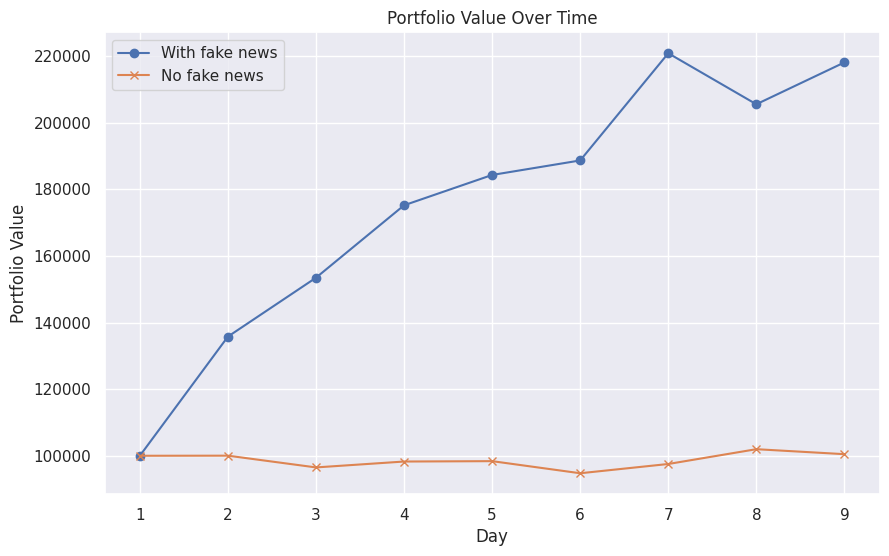

In [ ]:
portfolio_values_extended = [100000.0, 135783.527791172, 153468.36379599053, 175218.38458030124, 184330.14083826885,
                              188688.00451185612, 220878.79301822156, 205559.94439975068, 218125.60738532274]
portfolio_values_prices = [100000, 100028.86, 96500.39, 98269.45, 98383.21, 94750.29, 97530.66, 101975.40, 100478.70]

days = range(1, len(portfolio_values_extended) + 1)
plt.figure(figsize=(10, 6))
plt.plot(days, portfolio_values_extended, label='With fake news', marker='o')
plt.plot(days, portfolio_values_prices, label='No fake news', marker='x')

plt.title('Portfolio Value Over Time')
plt.xlabel('Day')
plt.ylabel('Portfolio Value')
plt.legend()

plt.grid(True)

plt.show()